# Biplane -v- Glider

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#Data lists
Gli_20 = np.array([2,4.5,5.5])
Gli_37 = np.array([3.5,4.5,6])
Bi_20 = np.array([4,6,8])
Bi_37 = np.array([3,7,9])
x = [1,2,3]

In [10]:
#Adjust data to equalise by wing length
adjust = 60./80
Bi_20 = Bi_20*adjust
Bi_37 = Bi_37*adjust
#(Bi_20+Gli_37)/2.

In [11]:
A = np.vstack([x,np.ones(len(x))]).T #x^0 the last row NB
slope, intercept = np.linalg.lstsq(A,Gli_20)[0]
A,slope, intercept
def linfit(x,slope,intercept):
    return x*slope + intercept
A, linfit(3,slope,intercept)

(array([[ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.]]), 5.7500000000000009)

In [12]:
z = np.polyfit(x, Gli_20, 1)
pG20 = np.poly1d(z)

z = np.polyfit(x, Gli_37, 1)
pG37 = np.poly1d(z)

z = np.polyfit(x, Bi_20, 1)
pB20 = np.poly1d(z)

z = np.polyfit(x, Bi_37, 1)
pB37 = np.poly1d(z)
pB37(x)
z = np.polyfit(x,(Gli_20+Gli_37)/2.,1)
p = np.poly1d(z)

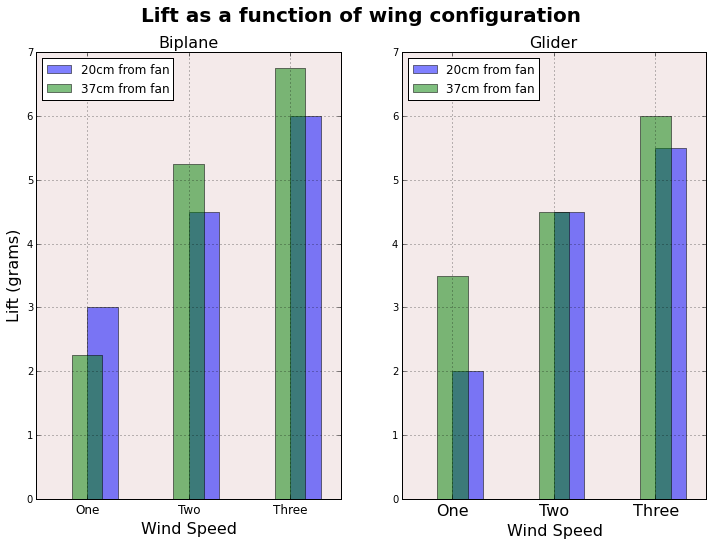

In [13]:
fsize = 16
fig = plt.figure(figsize=(12,8))
fig.suptitle('Lift as a function of wing configuration', fontsize=20, fontweight='bold')
ax1 = fig.add_subplot(121, axisbg="#F4EAEA")
ax1.set_xlabel('Wind Speed',fontsize=fsize)
ax1.set_ylabel('Lift (grams)',fontsize=fsize)
ax1.set_title('Biplane',fontsize=fsize)
plt.bar(x,Bi_20,width=0.3,color='b',align='edge',alpha=.5,label='20cm from fan')
plt.bar(x,Bi_37,width=0.3,color='g',align='center',alpha=.5,label='37cm from fan')
#plt.plot(x,pB20(x), color='b', label='Fitted line')
#plt.plot(x,pB37(x),color='g')
plt.xticks(x, ['One','Two','Three'],fontsize=12)
plt.grid()
plt.legend(loc=2)

ax2 = fig.add_subplot(122,sharey=ax1, axisbg="#F4EAEA")
ax2.set_xlabel('Wind Speed',fontsize=fsize)
ax2.set_title('Glider',fontsize=fsize)
plt.bar(x,Gli_20,width=0.3,color='b',align='edge',alpha=.5,label='20cm from fan')
plt.bar(x,Gli_37,width=0.3,color='g',align='center',alpha=.5,label='37cm from fan')
#plt.plot(x,pG20(x), color='b', label='Fitted line')
#plt.plot(x,pG37(x),color='g')
plt.xticks(x, ['One','Two','Three'],fontsize=fsize)
plt.grid()
plt.legend(loc=2)
plt.savefig('Aircraft.jpeg',dpi=400)

In [14]:
#Overall Lift equation
Lift = (Gli_20+Gli_37+Bi_20+Bi_37)/4.
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A,Lift)[0]
m, c ,Lift

(1.6875000000000007, 1.1041666666666667, array([ 2.6875,  4.6875,  6.0625]))